# Raw model grid.
Examples of working with the raw model grid.

In [2]:
import Starfish

from Starfish.grid_tools import HDF5Creator

In [5]:
Starfish.config['grid']

{'air': False,
 'buffer': 50.0,
 'hdf5_path': 'libraries/PHOENIX_TRES_test.hdf5',
 'key_name': 't{0:.0f}g{1:.1f}z{2:.1f}',
 'norm': False,
 'parname': ['temp', 'logg', 'Z'],
 'parrange': [[6000, 6300], [4.0, 5.0], [-1.0, 0.0]],
 'raw_path': '/Users/gully/GitHub/Starfish/libraries/raw/PHOENIX/',
 'wl_range': [5000, 5200]}

In [7]:
# Specifically import the grid interface and instrument that we want.
instrument = eval("Starfish.grid_tools." + Starfish.data["instruments"][0])()

In [8]:
print(instrument)

Instrument Name: TRES, FWHM: 6.8, oversampling: 4.0, wl_range: (3500, 9500)


In [14]:
if (Starfish.data["grid_name"] == "PHOENIX") & (len(Starfish.grid['parname']) == 3):
    mygrid_class = eval("Starfish.grid_tools." + Starfish.data["grid_name"]+ "GridInterfaceNoAlpha")
else:
    mygrid_class = eval("Starfish.grid_tools." + Starfish.data["grid_name"]+ "GridInterface")

In [17]:
mygrid_class

Starfish.grid_tools.PHOENIXGridInterfaceNoAlpha

In [20]:
norm = Starfish.config["grid"]["norm"]
air = Starfish.config["grid"]["air"]

In [23]:
air=True

In [25]:
mygrid = mygrid_class(norm=norm, air=air)

In [26]:
from sklearn.decomposition import PCA

In [28]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [36]:
list1 = eval("list")

# Determine the ($\lambda$-dependent) flux ratio grid points

In [41]:
! ls libraries/

PHOENIX_TRES_test.hdf5


In [ ]:
import h5py

In [42]:
h5i = Starfish.grid_tools.HDF5Interface("libraries/PHOENIX_TRES_test.hdf5")

In [44]:
h5i.grid_points.shape

(36, 3)

In [47]:
h5i.grid_points[0::9]

array([[  6.00000000e+03,   4.00000000e+00,  -1.00000000e+00],
       [  6.10000000e+03,   4.00000000e+00,  -1.00000000e+00],
       [  6.20000000e+03,   4.00000000e+00,  -1.00000000e+00],
       [  6.30000000e+03,   4.00000000e+00,  -1.00000000e+00]])

In [57]:
vv = h5i.load_flux([6000, 4.0, -1.0])

In [ ]:
import numpy as np

In [74]:
rat = np.zeros((36,36))

In [190]:
dgrid = np.zeros((36,36,6))

In [160]:
for i in range(36):
    print(i, end=', ')
    for j in range(36):
        dgrid[i, j] = np.hstack((h5i.grid_points[i],h5i.grid_points[j]))
        rat[i, j] = np.mean(h5i.load_flux(h5i.grid_points[i]))/np.mean(h5i.load_flux(h5i.grid_points[j]))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

In [161]:
import matplotlib.pyplot as plt

In [162]:
%matplotlib inline

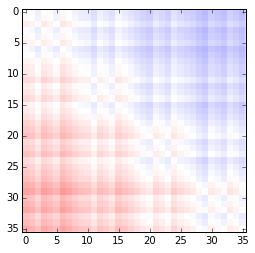

In [163]:
plt.imshow(rat, origin="upper", vmin=0, vmax=2, cmap="bwr", interpolation="none")

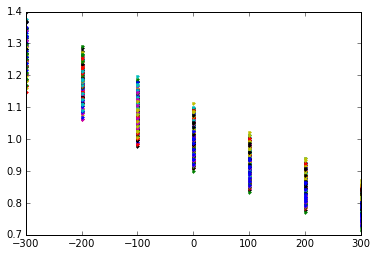

In [112]:
plt.plot(dteff, rat, '.');

## Redo but with long-thin matrices, so we don't make a reshape mistake

In [ ]:
dri

In [ ]:
for i in range(36):
    print(i, end=', ')
    for j in range(36):
        dgrid[i, j] = np.hstack((h5i.grid_points[i],h5i.grid_points[j]))
        rat[i, j] = np.mean(h5i.load_flux(h5i.grid_points[i]))/np.mean(h5i.load_flux(h5i.grid_points[j]))

In [130]:
from scipy.interpolate import griddata

In [174]:
from scipy.interpolate import LinearNDInterpolator

In [165]:
dgrid.shape, rat.shape

((36, 36, 6), (36, 36))

In [170]:
X_grid = dgrid.reshape(36*36, 6)
y_rat = rat.reshape(36*36)

In [171]:
X_grid.shape, y_rat.shape

((1296, 6), (1296,))

In [175]:
ld = LinearNDInterpolator(X_grid, y_rat)

In [178]:
X_grid[1]

array([  6.00000000e+03,   4.00000000e+00,  -1.00000000e+00,
         6.00000000e+03,   4.00000000e+00,  -5.00000000e-01])

In [189]:
ld([  6015,   4.15, 0., 6290,4.1, 0.0])

array([ 0.80178374])

In [113]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcess

In [ ]:
#------------------------------------------------------------
# define a squared exponential covariance function
def squared_exponential(x1, x2, h):
    return np.exp(-0.5 * (x1 - x2) ** 2 / h ** 2)

In [ ]:
#------------------------------------------------------------
# draw samples from the unconstrained covariance
np.random.seed(1)
x = np.linspace(0, 10, 100)
h = 1.0

mu = np.zeros(len(x))
C = squared_exponential(x, x[:, None], h)
draws = np.random.multivariate_normal(mu, C, 3)

In [ ]:
GaussianProcess()

In [119]:
gp_rat = GaussianProcess(corr='squared_exponential', theta0=0.5,
                      thetaL=0.01, thetaU=10.0,
                      nugget=(0.01) ** 2,
                      random_state=0)

In [118]:
design_matrix = np.hstack((h5i.grid_points, h5i.grid_points)).shape

In [121]:
rat.shape

(36, 36)

# Strategy 2

In [128]:
from astropy import units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu